# pandas 피봇팅과 그룹별 분석

- 피봇팅
- 스태킹과 언스태킹
- 그룹별 집계, 변형, 필터

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 1. 피봇팅(pivoting)

- 가지고 있는 데이터원본을 원하는 형태의 가공된 정보를 보여주는 것
    - 자료의 형태를 변경하기 위해 많이 사용하는 방법 

### 예.
**왼쪽표 : 제품이 생산될 때 마다 코드, 크기, 생산 수량을 기록**

- 피벗테이블1(오른쪽 표)
    - **지역과 제품코드별 생산수량 요약**
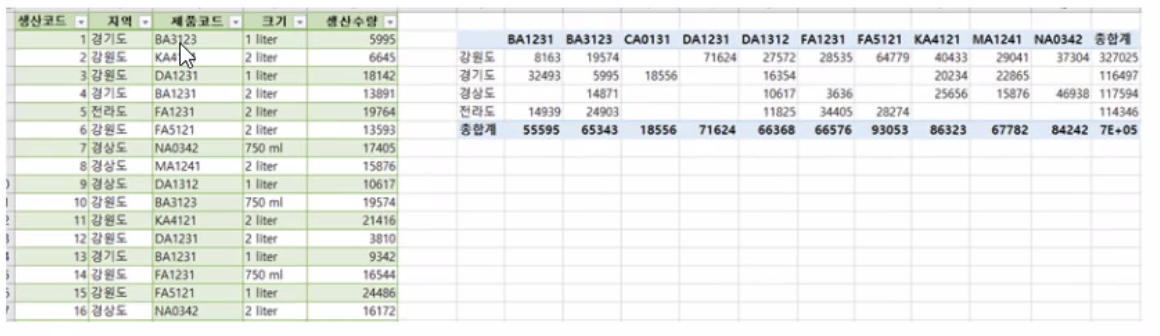


- 피벗테이블2(오른쪽 표)
    - **제품크기와 제품코드별로 생산수량 요약**
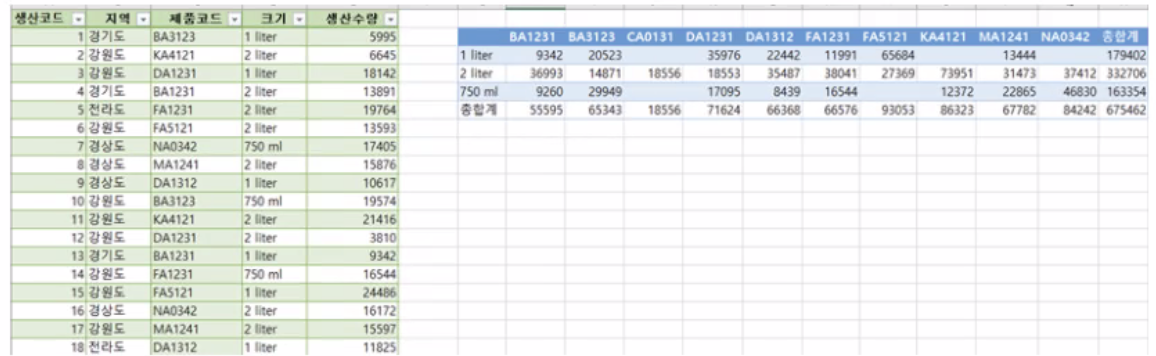

### 피보팅을 위한 메소드 : pivot(), pivot_table()

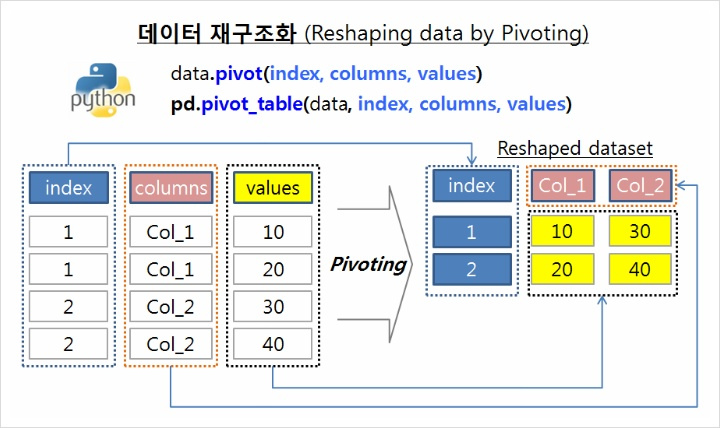

- 출처 : https://rfriend.tistory.com/275

### pivot( )
- pandas.pivot(data, index=None, columns=None, values=None)
- DataFrame.pivot(index=None, columns=None, values=None)

### pivot_table( )

- 방법 : **두 개의 키를 사용**해서 데이터를 선택



- **pivot_table(data, index=None, columns=None, values=None**,
    aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
    
    - data : 분석할 데이터 프레임의 메서드 형식일 때는 필요하지 않음 
        - ex1. pandas.pivot_table(df1, )
        - ex2. df1.pivot_table()
    - index :  **행 인덱스**로 들어갈 키열 또는 키열의 리스트
    - columns : **열 인덱스**로 들어갈 키열 또는 키열의 리스트
    - values : 분석할 데이터 프레임에서 분석할 열
    - fill_value : NaN이 표출될 때 대체값 지정
    - margins : 모든 데이터를 분석한 결과를 행으로 표출할 지 여부
    - margins_name : margins가 표출될 때 그 열(행)의 이름`

#### 피봇테이블을 작성할 때 반드시 설정해야 되는 인수
- data : 사용 데이터 프레임
- index : 행 인덱스로 사용할 필드(기준 필드로 작용됨)
- values : 인덱스 명을 제외한 나머지 값(data)은 수치 data 만 사용함
- aggfunc: 기본 함수가 평균(mean)함수 이기 때문에 각 데이터의 평균값이 반환

### 예제1. pivot() 사용

In [3]:
data = {
    "도시": ["서울", "서울", "서울", "부산", 
           "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015",
           "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737,
           3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권",
           "경상권", "경상권", "수도권", "수도권"]
}

columns = ["도시", "연도", "인구", "지역"]

df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


**피벗테이블1 : 각 도시에 대한 연도별 평균 인구**

In [4]:
# 각 도시에 대한 연도별 평균 인구

df1.pivot('도시','연도','인구') 
# index='도시', column='연도', value='인구', aggfunc=mean(Default 값)

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


**피벗테이블2: 지역별 도시에 대한 연도별 평균 인구**

In [5]:
# 각 지역별 도시에 대한 연도별 평균 인구

df1.pivot(['지역','도시'],'연도','인구')

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

### 예제2. 타이타닉 데이터 : pivot_table() 사용

In [7]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


**피봇테이블1 : 선실등급별 숙박객의 성별 평균 나이**

In [14]:
# 각 선실 등급별로 숙박객의 성별 평균 나이
pd.pivot_table(df, index='class',columns='sex',values='age', aggfunc="mean")

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


**피봇테이블2 : 선실등급별 숙박객의 생존 여부에 따른 평균 나이**

In [20]:
# 각 선실 등급별 숙박객의 생존 여부에 따른 평균 나이
pd.pivot_table(df, index='class',columns='survived',values='age', aggfunc="mean")

survived,0,1
class,,
First,43.695312,35.368197
Second,33.544444,25.901566
Third,26.555556,20.646118


**피봇테이블3 : 선실등급과 성별에 대해 생존여부에 따른 나이와 티켓값의 평균과 최대값 계산**

In [21]:
pd.pivot_table(df, index=['class','sex'],
               columns='survived',
               values=['age','fare'], 
               aggfunc=["mean","max"])

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

# 2. 스태킹(stacking)과 언스태킹(unstacking)

: 피벗팅과 유사하지만 계층형 인덱스의 특정 수준도 회전이 가능함

- 스태킹(stacking) : **컬럼 레이블**과 그 값을 **로우 인덱스**와 값으로 회전시킴
- 언스태킹(unstacking) : **로우 인덱스**와 그 값이 **컬럼 레이블**과 값으로 회전시킴

- DataFrame.unstack(level=- 1, fill_value=None)
    - level : int, str, list, default=-1
        - 언스태킹을 적용하는 레벨
        - 기본값은 마지막 레벨 : 언스태킹 결과 항상 마지막 레벨로 이동
    - fill_value : int, str or dict
        - 언스태킹 결과 결측치는 NaN으로 대체
        
        
- DataFrame.stack(level=- 1, dropna=True)
    - level : int, str, list, default=-1
        - 언스태킹을 적용하는 레벨
        - 기본값은 마지막 레벨 : 언스태킹 결과 항상 마지막 레벨로 이동
    - dropna : bool, default True
        - 스태킹 결과 결측치 처리 여부, 기본값은 True로 결측치 제외

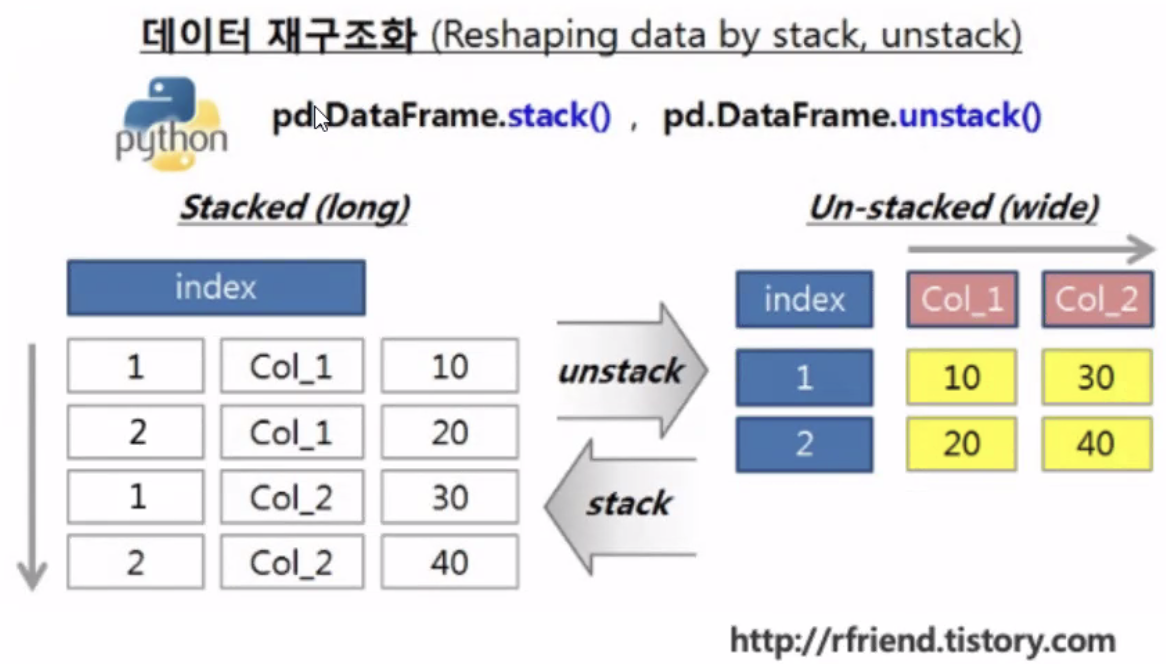

### 스태킹(stacking)

**예제. single level columns를 갖는 데이터**

In [22]:
# single level coloumns
df = pd.DataFrame([[0, 1], [2, 3]],
                  index=['cat', 'dog'],
                  columns=['weight', 'height'])
df

,weight,height
cat,0,1
dog,2,3


**스태킹(stacking)**

In [23]:
df.stack()

cat  weight    0
     height    1
dog  weight    2
     height    3
dtype: int64

**예제. multi-level columns을 갖는 데이터1**

In [24]:
multicol = pd.MultiIndex.from_tuples([('weight','kg'),
                                      ('weight','pounds')])
df2 = pd.DataFrame([[1, 2], [2, 4]],
                  index=['cat', 'dog'],
                  columns= multicol)
df2

weight       
        kg pounds
cat      1      2
dog      2      4

**스태킹(stacking)**

In [25]:
# 마지막 레벨로 이동
df2.stack()

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

**예제. multi-level columns을 갖는 데이터2**

In [26]:
multicol2 = pd.MultiIndex.from_tuples([('weight','kg'),
                                      ('height','m')])
df3 = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]],
                  index=['cat', 'dog'],
                  columns= multicol2)
df3

,weight,height
,kg,m
cat,1.0,2.0
dog,3.0,4.0


**스태킹(stacking)**

In [27]:
# 스태킹 결과 마지막 레벨로 이동
df3.stack()

height  weight
cat kg     NaN     1.0
    m      2.0     NaN
dog kg     NaN     3.0
    m      4.0     NaN

In [28]:
# 스태킹 결과 첫번째 레벨로 이동
df3.stack(0) # 첫번째 레벨

kg    m
cat height  NaN  2.0
    weight  1.0  NaN
dog height  NaN  4.0
    weight  3.0  NaN

In [29]:
# 두 단계 레벨 모두 이동
df3.stack([0,1])

cat  height  m     2.0
     weight  kg    1.0
dog  height  m     4.0
     weight  kg    3.0
dtype: float64

**예제. multi-level columns을 갖는 데이터3**

In [32]:
multicol2 = pd.MultiIndex.from_tuples([('weight','kg'),
                                      ('height','m')])
df4 = pd.DataFrame([[None, 1.0], [2.0, 3.0]],
                  index=['cat', 'dog'],
                  columns= multicol2)
df4

,weight,height
,kg,m
cat,NaN,1.0
dog,2.0,3.0


**스태킹(stacking) 결과 결측치 처리 : dropna 인수**

In [34]:
# 스태킹 결과 결측치 행 포함
df4.stack(dropna=False)

height  weight
cat kg     NaN     NaN
    m      1.0     NaN
dog kg     NaN     2.0
    m      3.0     NaN

In [35]:
# 스태킹 결과 결측치 행 삭제
df4.stack(dropna=True)
df4.stack()

height  weight
cat m      1.0     NaN
dog kg     NaN     2.0
    m      3.0     NaN

height  weight
cat m      1.0     NaN
dog kg     NaN     2.0
    m      3.0     NaN

: row의 각 열에 모두 결측치가 있는 경우 스태킹 결과 삭제됨 

### 언스태킹(unstacking)

**예제 데이터**

In [36]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

**마지막 레벨로 언스태킹(unstacking)**

In [39]:
s.unstack()
s.unstack(level=-1)
s.unstack(-1)

,a,b
one,1.0,2.0
two,3.0,4.0


,a,b
one,1.0,2.0
two,3.0,4.0


,a,b
one,1.0,2.0
two,3.0,4.0


**첫번째 레벨로 언스태킹(unstacking)**

In [40]:
s.unstack(0)

,one,two
a,1.0,3.0
b,2.0,4.0


# 3. 그룹 분석

- 그룹분석(group analysis)은 피봇테이블과 달리 키에 의해서 결정되는 데이터가 여러 개 있는 경우 미리 지정한 연산을 통해 각 그룹 데이터의 대표값을 계산하는 것


- 만약 키가 지정하는 조건에 맞는 데이터가 하나 이상이라서 데이터 그룹을 이루는 경우에는 그룹의 특성을 보여주는 그룹분석을 해야 함

### 데이터 분석을 위한 분할-적용-조합 패턴

- **분할(SPLIT)** : 어떤 기준에 따라 데이터셋을 작은 조각으로 분할한다
- **적용(APPLY)** : 각 조각에 대해 독립적으로 연산을 수행한다
- **조합(COMBINE)** : 모든 결과를 다시 하나의 단위로 조합한다

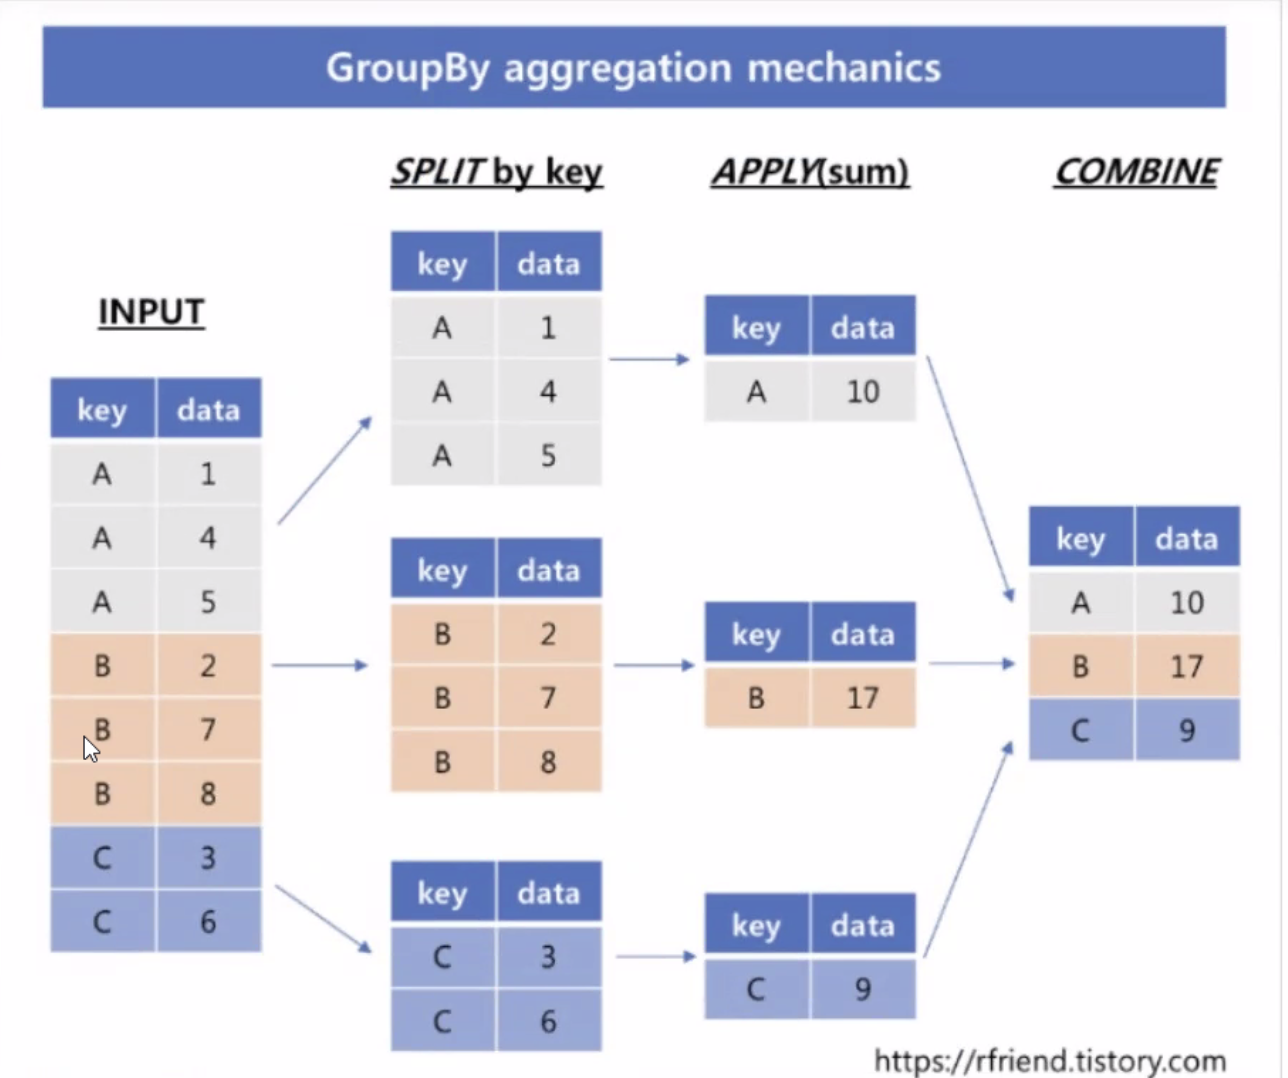

### 데이터 분할(split) 작업
- 시리즈나 데이터프레임의 **groupby() 메소드**로 수행
- 하나 이상의 인덱스 레이블이나 컬럼명을 지정하여 이에 기초하여 연관된 값들이 그룹화 됨


- 판다스에서는 **groupby() 메서드**를 사용하여 다음과 같이 그룹분석을 진행
    - 분석하고자 하는 시리즈나 데이터프레임에 **groupby() 메서드**를 호출하여 그룹화 수행
    - 그룹 객체에 대해 그룹연산을 수행

##### groupby () 메서드¶

- 데이터를 그룹 별로 분류하는 역할을 함 

- groupby() 메서드의 인수

    - 열 또는 열의 리스트

    - 행 인덱스

- 연산 결과 : 그룹 데이터를 나타내는**GroupBy 클래스 객체를 반환**
    - 이 객체에는 그룹별로 연산을 할 수 있는 그룹연산 메서드가 있음

### 데이터 분할 후 각 그룹에 적용되는 작업

- **집계(aggregation)** : 각 그룹의 아이템에 대한 평균이나 개수 계산
- **변형(transform)** : 그룹이나 아이템에 특정적인 계산을 수행
- **필터링(filtering)** : 그룹 단위의 계산에 기초해 불필요한 데이터 그룹 제거

#### GroupBy 클래스 객체의 그룹연산 메소드

- **size, count**: 그룹 데이터의 갯수

- **mean, median, min, max**: 그룹 데이터의 평균, 중앙값, 최소, 최대

- **sum, prod, std, var, quantile** : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수

- **first, last**: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터


#### 그외 자주 이용되는 그룹별 연산관련 메소드

- **agg, aggregate**

    - 만약 원하는 그룹연산이 없는 경우 함수를 만들고 이 함수를 agg에 전달한다.

    - 또는 여러가지 그룹연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달한다.

- **describe**

    - 하나의 그룹 대표값이 아니라 여러개의 값을 데이터프레임으로 구한다.

- **apply**

    - describe 처럼 하나의 대표값이 아닌 데이터프레임을 출력하지만 원하는 그룹연산이 없는 경우에 사용한다.

- **transform**

    - 그룹에 대한 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터 자체를 변형한다.

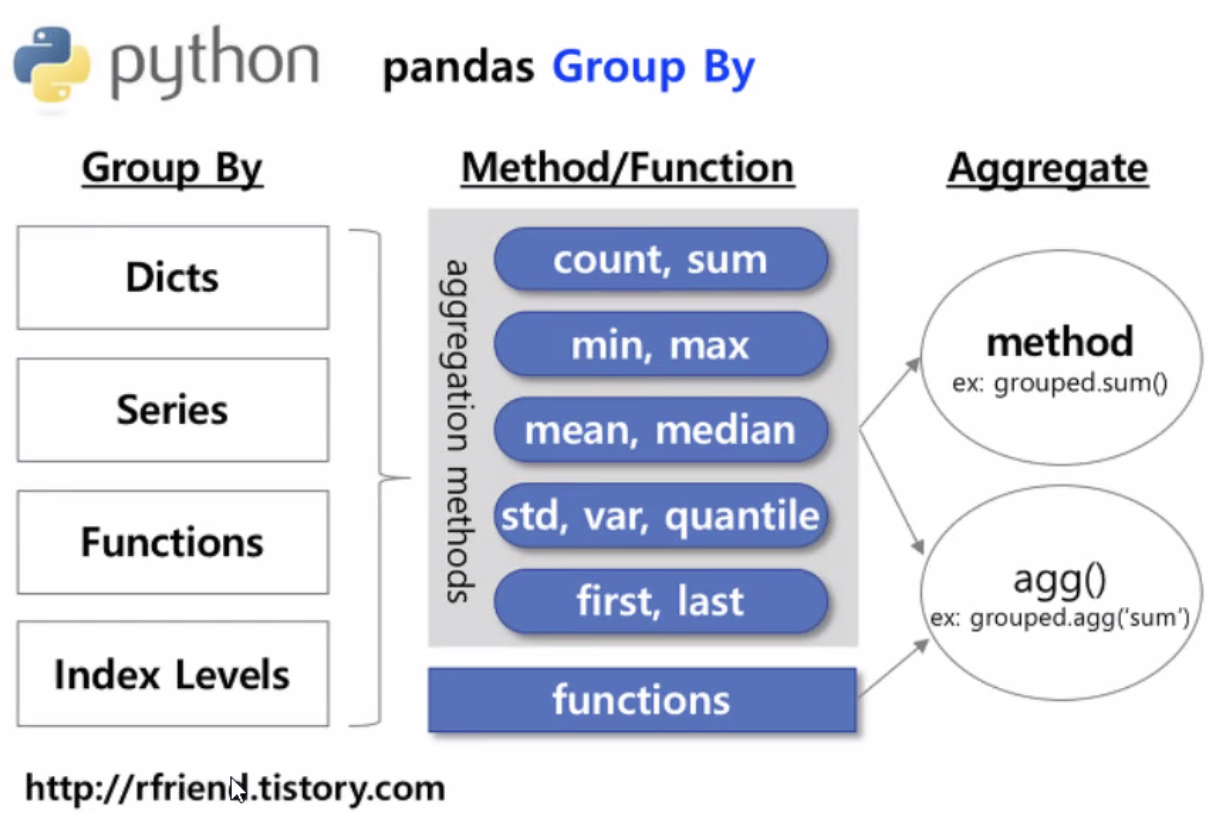

## 데이터 분할

1. 단일 컬럼의 그룹화
2. 복수 컬럼의 그룹화
3. 인덱스 레벨을 이용한 그룹화

### 예제 데이터 준비

In [58]:
df = pd.DataFrame({
    'key1':['A','A','B','B','A'],
    'key2':['one','two','one','two','one'],
    'data1':np.arange(1,6),
    'data2':np.arange(10,60,10)})
df

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [55]:
data = pd.DataFrame({
    'key1':['A','A','B','B','A'],
    'key2':['one','two','one','two','one'],
    'data1':[1,2,3,4,5],
    'data2':[10,20,30,40,50]})
data

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


### 단일 컬럼의 그룹화

In [56]:
groups = data.groupby(data.key1)
groups

**groups 속성 : GroupBy클래스객체 groups의 그룹정보 확인**
- 각 그룹의 이름을 키로 갖는 파이썬 딕셔너리를 반환
- 딕셔너리 값은 각 그룹에 속하는 인덱스 레이블의 배열
- Dict {group name -> group labels}

In [57]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

**ngroups 속성 : group 수 반환**

In [59]:
groups.ngroups

2

**그룹화된 결과 접근**
- 그룹 내용 출력함수 정의 : print_groups(group_object)

In [60]:
def print_groups(group_object):
    for name, group in group_object:
        print(name)
        print(group[:5])

In [61]:
print_groups(groups)

A
  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
4    A  one      5     50
B
  key1 key2  data1  data2
2    B  one      3     30
3    B  two      4     40


-> 각 그룹은 그룹명과 일치하는 값들의 로우들로 구성된 데이터프레임을 하나씩 포함하고 있음

**그룹정보 groups를 데이터프레임으로 저장**

In [64]:
pd.DataFrame(groups)

,0,1
0,A,key1 key2 data1 data2 0 A one 1 ...
1,B,key1 key2 data1 data2 2 B one 3 ...


- 첫번째 그룹 정보

In [65]:
pd.DataFrame(groups).loc[0]

0                                                    A
1      key1 key2  data1  data2
0    A  one      1  ...
Name: 0, dtype: object

In [66]:
pd.DataFrame(groups).loc[0].values

array(['A',   key1 key2  data1  data2
            0    A  one      1     10
            1    A  two      2     20
            4    A  one      5     50], dtype=object)

- 두번째 그룹 정보

In [67]:
pd.DataFrame(groups).loc[1]

0                                                    B
1      key1 key2  data1  data2
2    B  one      3  ...
Name: 1, dtype: object

In [68]:
pd.DataFrame(groups).loc[1].values

array(['B',   key1 key2  data1  data2
            2    B  one      3     30
            3    B  two      4     40], dtype=object)

**.size() 메소드 : 각 그룹의 크기 반환**

In [69]:
groups.size()

key1
A    3
B    2
dtype: int64

**.count() 메소드 : 각 그룹의 컬럼별 아이템 개수 반환**

In [70]:
groups.count()

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


**.sum() 메소드 : 각 그룹의 컬럼별 합계 반환**

In [71]:
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


**선택한 컬럼에 대한 그룹별 합계 반환1**
- 그룹객체[컬럼명].sum()
- 그룹객체.sum()[컬럼명]
- 반환값은 시리즈 형식

In [73]:
groups['data1'].sum()
groups.sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

key1
A    8
B    7
Name: data1, dtype: int64

In [74]:
type(groups['data1'].sum())

pandas.core.series.Series

**선택한 컬럼에 대한 그룹별 합계 반환2**
- [컬럼명]리스트로 지정한 경우 : 데이터프레임 형식으로 반환
- 그룹객체[[컬럼명]].sum()
- 그룹객체.sum()[[컬럼명]]

In [75]:
groups[['data1']].sum()
groups.sum()[['data1']]

,data1
key1,
A,8
B,7


,data1
key1,
A,8
B,7


In [76]:
type(groups[['data1']].sum())

pandas.core.frame.DataFrame

### 복수 컬럼의 그룹화

- .groupby( ) 메소드에 그룹명의 리스트를 전달하면 여러 컬럼에 대해 그룹화를 수행

In [77]:
groups2 = data.groupby([data.key1,data.key2])
groups2

**그룹정보 확인**
- 복수 컬럼으로 된 그룹정보 : 튜플형태로 반환

In [78]:
groups2.groups

{('A', 'one'): [0, 4], ('A', 'two'): [1], ('B', 'one'): [2], ('B', 'two'): [3]}

**그룹수 반환**

In [79]:
groups2.ngroups

4

**그룹정보 출력 : print_groups()함수 정의**

In [80]:
print_groups(groups2)

('A', 'one')
  key1 key2  data1  data2
0    A  one      1     10
4    A  one      5     50
('A', 'two')
  key1 key2  data1  data2
1    A  two      2     20
('B', 'one')
  key1 key2  data1  data2
2    B  one      3     30
('B', 'two')
  key1 key2  data1  data2
3    B  two      4     40


### 인덱스 레벨을 이용한 그룹화

- 컬럼 대신 인덱스의 값을 사용해 그룹화

**예제 데이터**
- 앞의 df2를 계층형 인덱스를 갖도록 데이터 구성 변경

In [81]:
data

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [85]:
data2 = data.copy()
data2 = data2.set_index(['key1','key2'])
data
data2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


data1  data2
key1 key2              
A    one       1     10
     two       2     20
B    one       3     30
     two       4     40
A    one       5     50

**레벨0(key1)을 사용해 그룹화**

In [86]:
print_groups(data2.groupby(level = 0))

A
           data1  data2
key1 key2              
A    one       1     10
     two       2     20
     one       5     50
B
           data1  data2
key1 key2              
B    one       3     30
     two       4     40


**레벨1(key2)을 사용해 그룹화**

In [87]:
print_groups(data2.groupby(level = 1))

one
           data1  data2
key1 key2              
A    one       1     10
B    one       3     30
A    one       5     50
two
           data1  data2
key1 key2              
A    two       2     20
B    two       4     40


## 그룹별 집계

### 참고. GroupBy객체에 적용되는 집계 관련 내장메소드

- gb.agg()
- gb.boxplot()
- gb.cummin()
- gb.describe()
- gb.filter()
- gb.get_group()
- gb.height()
- gb.last()
- gb.median()
- gb.ngroups()
- gb.plot()
- gb.rank()
- gb.std()
- gb.transform()
- gb.aggregate()
- gb.count()
- gb.cumprod()
- gb.dtype()
- gb.first()
- gb.groups()
- gb.hist()
- gb.max()
- gb.min()
- gb.nth()
- gb.prod()
- gb.resample()
- gb.sum()
- gb.var()
- gb.apply()
- gb.cummax()
- gb.cumsum()
- gb.fillna()
- gb.gender()
- gb.head()
- gb.indices()
- gb.mean()
- gb.name()
- gb.ohlc()
- gb.quantile()
- gb.size()
- gb.tail()
- gb.weight()

**예제 데이터 : iris**

In [88]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [89]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**픔종별로 그룹화**

In [91]:
# iris 품종별로 그룹
i_groups = iris.groupby(iris.species)
i_groups

**품종별 합계 계산**

In [92]:
i_groups.sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


**품종별 평균 계산**

In [93]:
i_groups.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


**품종별 기술통계**

In [94]:
i_groups.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [95]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### [ ] 연산자를 사용해 특정 컬럼에 대한 집계 연산 수행

In [96]:
i_groups['sepal_length'].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [98]:
i_groups[['sepal_length','petal_length']].mean()

,sepal_length,petal_length
species,,
setosa,5.006,1.462
versicolor,5.936,4.260
virginica,6.588,5.552


In [99]:
i_groups['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


## 그룹별 집계 함수 : apply() / agg() , aggregate()

### agg() 또는 aggregate()

- 각 그룹에 대해 집계함수를 모두 적용
- 적용할 함수의 참조를 파라미터로 전달
- 데이터프레임의 경우 그룹 안의 각 컬럼 데이터에 적용됨
- 숫자 타입의 스칼라만 리턴하는 함수를 적용하는 apply()의 특수한 경우
    - 참고. 스칼라(scalar)
        - 하나의 수치(數値)만으로 완전히 표시되는 양
        - 방향의 구별이 없는 물리적 수량
        - 질량·에너지·밀도(密度)·전기량(電氣量) 따위

**GroupBy.agg(func, *args, **kwargs)**

- func : 함수이름
    - 내장함수는 np.sum 또는 'sum'으로 지정, 사용자정의함수는 함수이름 그대로
- *args : 함수의 매개변수들
- **kwargs : 함수에 들어가는 키워드 인수들

**각 컬럼의 최대값과 최소값의 비율 계산**
- 함수 peak_to_peak_ratio() 작성

In [100]:
def peak_to_peak_ratio(x):
    return x.max() / x.min() # 함수 반환 값이 수치 스칼라 타입

- 품종(그룹)별 최대값과 최소값의 비율 계산

In [101]:
# 품종별로 사용자 정의함수 peak_to_peak_ratio 연산 적용
i_groups.agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


### agg() 메소드에 여러 함수 적용

**.agg([함수1, 함수2,...])**

In [102]:
i_groups.agg([np.sum,np.mean])

sepal_length        sepal_width        petal_length         \
                    sum   mean         sum   mean          sum   mean   
species                                                                 
setosa            250.3  5.006       171.4  3.428         73.1  1.462   
versicolor        296.8  5.936       138.5  2.770        213.0  4.260   
virginica         329.4  6.588       148.7  2.974        277.6  5.552   

           petal_width         
                   sum   mean  
species                        
setosa            12.3  0.246  
versicolor        66.3  1.326  
virginica        101.3  2.026

In [107]:
i_groups.agg(['sum','mean'])

sepal_length        sepal_width        petal_length         \
                    sum   mean         sum   mean          sum   mean   
species                                                                 
setosa            250.3  5.006       171.4  3.428         73.1  1.462   
versicolor        296.8  5.936       138.5  2.770        213.0  4.260   
virginica         329.4  6.588       148.7  2.974        277.6  5.552   

           petal_width         
                   sum   mean  
species                        
setosa            12.3  0.246  
versicolor        66.3  1.326  
virginica        101.3  2.026

### apply( )

: 어떤 함수나 적용 가능

**GroupBy.apply(func, *args, **kwargs)**

- func : 함수이름
    - 내장함수는 np.sum 또는 'sum'으로 지정, 사용자정의함수는 함수이름 그대로
- *args : 함수의 매개변수들
- **kwargs : 함수에 들어가는 키워드 인수들

**Top3 산출**
- petal_length 기준으로 Top3 항목 선택

In [105]:
def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending=False)[:3] 

# 함수 반환값이 수치 집합

- 품종별로 petal_length 기준의 Top3

In [106]:
iris.groupby(iris.species).apply(top3_petal_length)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

- agg( )는 반환값이 수치스칼라인 경우만 사용 가능
- apply()는 반환값이 수치 집합인 경우 적용 가능

In [48]:
# iris.groupby(iris.species).agg(top3_petal_length) 
# 반환값이 수치 스칼라인 경우 적용 가능한데 반환값이 수치 집합 이므로 에러 발생

- 품종별로 최대값과 최소값 비중

In [108]:
iris.groupby(iris.species).apply(peak_to_peak_ratio) 

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


**수치형자료를 대,중,소 3범주를 갖는 범주형으로 변환 : qcut()**

In [109]:
def q3cut(s):
    return pd.qcut(s, 3, labels=["소", "중", "대"]).astype(str)

**품종별로 petal_length를 대,중,소 3범주로 변환**

In [110]:
iris.groupby(iris.species).petal_length.apply(q3cut) #petal_length 변수에 대해서만

0      소
1      소
2      소
3      중
4      소
      ..
145    소
146    소
147    소
148    중
149    소
Name: petal_length, Length: 150, dtype: object

**품종별로 petal_length를 대,중,소 3범주로 변환된 값을 petal_length_class변수로 추가** 

In [111]:
iris["petal_length_class"] = iris.groupby(iris.species).petal_length.apply(q3cut)
iris.head(10)
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_class
0,5.1,3.5,1.4,0.2,setosa,소
1,4.9,3.0,1.4,0.2,setosa,소
2,4.7,3.2,1.3,0.2,setosa,소
3,4.6,3.1,1.5,0.2,setosa,중
4,5.0,3.6,1.4,0.2,setosa,소
5,5.4,3.9,1.7,0.4,setosa,대
6,4.6,3.4,1.4,0.3,setosa,소
7,5.0,3.4,1.5,0.2,setosa,중
8,4.4,2.9,1.4,0.2,setosa,소
9,4.9,3.1,1.5,0.1,setosa,중


,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_class
140,6.7,3.1,5.6,2.4,virginica,중
141,6.9,3.1,5.1,2.3,virginica,소
142,5.8,2.7,5.1,1.9,virginica,소
143,6.8,3.2,5.9,2.3,virginica,대
144,6.7,3.3,5.7,2.5,virginica,중
145,6.7,3.0,5.2,2.3,virginica,소
146,6.3,2.5,5.0,1.9,virginica,소
147,6.5,3.0,5.2,2.0,virginica,소
148,6.2,3.4,5.4,2.3,virginica,중
149,5.9,3.0,5.1,1.8,virginica,소


----------------------------------------

## 그룹함수  및 피봇 테이블 이용 간단한 분석 예제

#### 식당에서 식사 후 내는 팁(tip)과 관련된 데이터 : tips

- seaborn 패키지 내 tips 데이터셋 사용

    - total_bill: 식사대금

    - tip: 팁

    - sex: 성별

    - smoker: 흡연/금연 여부

    - day: 요일

    - time: 시간

    - size: 인원

In [134]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


##### 식사 대금 대비 팁의 비율이 언제 가장 높아지는가?

- 가공 필드 생성 : 식사대금 대비 팁의 비율
    - tip_pt = 팁 / 식사대금

In [137]:
tips["tip_pt"] = tips["tip"]/tips["total_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [69]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   tip_pt      244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.2 KB


In [70]:
tips.describe()

,total_bill,tip,size,tip_pt
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [72]:
# 성별 인원수를 계산
tips_g = tips.groupby('sex')
tips_g.count()
tips_g.size()

,total_bill,tip,smoker,day,time,size,tip_pt
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


sex
Male      157
Female     87
dtype: int64

In [73]:
# 흡연 유무에 따른 성별 인원

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [75]:
# 흡연 유무에 따른 성별 인원을 피봇테이블로 구현



smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [78]:
# 성별 팁 비율의 평균


sex
Male      0.157651
Female    0.166491
Name: tip_pt, dtype: float64

In [79]:
# 흡연 유무에 따른 팁 비율의 평균


smoker
Yes    0.163196
No     0.159328
Name: tip_pt, dtype: float64

In [77]:
# 성별과 흡연 유무에 따른 팁 비율의 평균



smoker,Yes,No
sex,,
Male,0.152771,0.160669
Female,0.182150,0.156921


##### 여성 혹은 흡연자의 팁 비율이 조금 높고, 여성 흡연자가 팁을 많이 줌 

In [82]:
# 평균 통계량만 확인 했으므로 다른 통계값도 확인


tip_pt                                                    \
               count      mean       std       min       25%       50%   
sex    smoker                                                            
Male   Yes      60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No       97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes      33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No       54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                                   
                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

------------------------------------------------

## 데이터 그룹의 변형 : transform()

### 데이터 변형의 일반적인 과정

: transform() 메소드는 데이터프레임의 모든 값에 함수를 적용하며, 다음의 특성을 갖는 새 데이터프레임을 반환한다

- 모든 그룹의 인덱스가 합쳐진 인덱스를 갖는다
- row의 개수는 모든 그룹의 row 개수의 총합과 같다
- 그룹화 대상이 아닌 컬럼도 함수가 성공적으로 적용된다면 결과에 포함되며, 그렇지 않은 컬럼은 삭제될 수 있다

**예제 데이터1**

In [113]:
trans_data = pd.DataFrame({'Label' : ['A','C','B','A','C'],
                           'Values': [0, 1, 2, 3, 4],
                           'Values2' : [5, 6, 7, 8, 9],
                           'Other': ['foo','bar','baz','fiz','buz']},
                         index=list('VWXYZ'))
trans_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


**Label 컬럼으로 그룹화**

In [114]:
groups = trans_data.groupby('Label')
groups

In [63]:
print_groups(groups)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [115]:
groups.groups

{'A': ['V', 'Y'], 'B': ['X'], 'C': ['W', 'Z']}

### 각 값에 10을 더하는 함수를 적용해 데이터프레임 변형 수행

In [116]:
groups.transform(lambda x : x+10)

/var/folders/qk/0ttws_bs3s1fydtrkp_804nc0000gn/T/ipykernel_71512/3050928068.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  groups.transform(lambda x : x+10)


,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


-> 'Label'과 'Other' 컬럼은 문자열 값들이므로 함수 적용에 실패하여 두 컬럼은 결과에서 제외됨

### 그룹의 평균으로 결측값 채우기

**예제 데이터2**

In [117]:
trans_data2 = pd.DataFrame({'Label' : list('ABABAB'),
                            'Values' : [10, 20, 11, np.nan, 12, 22]})
trans_data2

,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,NaN
4,A,12.0
5,B,22.0


In [120]:
groups = trans_data2.groupby('Label')
groups.groups
print_groups(groups)

{'A': [0, 2, 4], 'B': [1, 3, 5]}

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


**각 그룹의 평균 계산**

In [119]:
groups.mean()

,Values
Label,
A,11.0
B,21.0


**결측치(Nan) 채우기**

- 그룹별 평균으로 채우기

In [121]:
fillna = groups.transform(lambda x : x.fillna(x.mean()))
fillna

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


## 그룹 필터링 : filter()

- 데이터그룹을 선택적으로 삭제

**예제 데이터3**

In [131]:
df3 = pd.DataFrame({'Label' : list('AABCCC'),
                    'Values' : [1, 2, 3, 4, np.nan, 8]})
df3

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


**아이템의 개수가 지정한 최소한의 수를 넘지 않는 그룹을 제외**

In [124]:
df3.groupby('Label').filter(lambda x : x.Values.count() > 1)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


**NaN이 하나라도 존재하는 그룹 제외**

In [125]:
df3.groupby('Label').filter(lambda x : x.Values.isnull().sum() == 0)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


**전체 데이터셋 평균과의 차이가 2.0이 넘는 그룹 평균을 가진 그룹만 필터링**

In [126]:
# 그룹 내 평균
df3.groupby('Label').mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [132]:
# 그룹 간 평균
g_mean = df3.groupby('Label').mean().mean()

In [133]:
df3.groupby('Label').filter(lambda x : (x.Values.mean() - g_mean) > 2.0)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0
